#  Sentiment Analysis:
## Amazon Reviews: Unlocked Mobile Phones
The data comes from https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Amazon_Unlocked_Mobile.csv')

rows=df.shape[0]
df.shape

(413840, 6)

In [69]:
## around 20% null values
df.isnull().sum(axis=0).sum()/df.shape[0]


0.2016769766093176

In [73]:
# Drop missing values
df.dropna(inplace=True)

# Remove Neutral ratings
df = df[df['Rating'] != 3]
neutral_ratings=rows-df.shape[0]


# Encode 4s and 5s as 1 (rated positively)
# Encode 1s and 2s as 0 (rated poorly)
df['Positively Rated'] = np.where(df['Rating'] > 3, 1, 0)
df.head(10)

Product Name Brand Name   Price  \
0   "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1   "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2   "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3   "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4   "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
5   "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
6   "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
7   "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
8   "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
11  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

    Rating                                            Reviews  Review Votes  \
0        5  I feel so LUCKY to have found this used (phone...           1.0   
1        4  nice phone, nice up grade from my pantach revu...           0.0   
2        5                                       Very pleased           0.0   
3        4  It works good but it goes slow sometimes but i...           0.0   
4        4  Great phone to replace my lost phone. The only...           0.0   
5        1  I already had a phone with problems... I know ...           1.0   
6        2  The charging port was loose. I got that solder...           0.0   
7        2  Phone looks good but wouldn't stay charged, ha...           0.0   
8        5  I originally was using the Samsung S2 Galaxy f...           0.0   
11       5  This is a great product it came after two days...           0.0   

    Positively Rated  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
5                  0  
6                  0  
7                  0  
8                  1  
11                 1

In [74]:

# Almost 3/4th ratings are positive!
df['Positively Rated'].mean()

0.7482686025879323

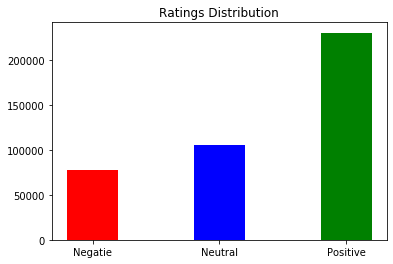

In [92]:
#Distributions of Neutral,positive and negative ratings;
positive_rated=df['Positively Rated'].sum()
negative_rated=df.shape[0]-positive_rated


plt.figure()
plt.bar(x=['Negatie','Neutral','Positive'],height=[negative_rated,neutral_ratings,positive_rated],width=0.4,color=['red','blue','green'])
plt.title("Ratings Distribution");

In [5]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], 
                                                    df['Positively Rated'], 
                                                    random_state=0)

# CountVectorizer

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer()
X_train_vectorized=vect.fit_transform(X_train)

#more 50k than features!
feature_names=np.array(vect.get_feature_names())
len(feature_names)

53216

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))


/home/himank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/himank/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [8]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91     19500
           1       0.96      0.98      0.97     57570

    accuracy                           0.95     77070
   macro avg       0.94      0.93      0.94     77070
weighted avg       0.95      0.95      0.95     77070

0.953263267159725


In [9]:
#get indexes of sorted coef
sorted_coef_index = model.coef_[0].argsort()


# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['mony' 'worst' 'false' 'worthless' 'horribly' 'messing' 'junk'
 'blacklist' 'garbage' 'unsatisfied']

Largest Coefs: 
['excelent' 'excelente' '4eeeks' 'exelente' 'efficient' 'excellent'
 'loving' 'pleasantly' 'loves' 'lovely']


In [10]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
model=MultinomialNB(alpha=0.01)
model.fit(X_train_vectorized,y_train)
predictions = model.predict(vect.transform(X_test))

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.87      0.84      0.86     19500
           1       0.95      0.96      0.95     57570

    accuracy                           0.93     77070
   macro avg       0.91      0.90      0.90     77070
weighted avg       0.93      0.93      0.93     77070



# Tf-Idf

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
## TfIdf reflects importance of words for classification.

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5. 
# this might prevent overfitting
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())

17951

In [12]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))


print(classification_report(y_test,predictions))

/home/himank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.91      0.88      0.90     19500
           1       0.96      0.97      0.97     57570

    accuracy                           0.95     77070
   macro avg       0.94      0.93      0.93     77070
weighted avg       0.95      0.95      0.95     77070



In [13]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['ciuld' 'equipmentthank' 'effectively' 'andsecond' 'ditches' 'custo'
 'encryption' 'conecction' 'blistering' 'anxious']

Largest Coefs: 
['cans' 'beining' 'atractive' 'compeition' '30000mah' '4months' 'compensa'
 'apps' '629' 'capabilites']


In [14]:
# However, These reviews are treated the same by our current model.
# one grams do not care about order of words.
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[0 0]


# n-grams: 

### To address the above problem

In [15]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

198917

In [16]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print(classification_report(y_test, predictions))

/home/himank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/himank/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.96      0.94      0.95     19500
           1       0.98      0.99      0.98     57570

    accuracy                           0.97     77070
   macro avg       0.97      0.96      0.97     77070
weighted avg       0.97      0.97      0.97     77070



In [17]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_.copy()[0].argsort()
# both one grams and two grams are important features.
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['no good' 'worst' 'junk' 'not good' 'not happy' 'horrible' 'garbage'
 'terrible' 'not satisfied' 'not worth']

Largest Coefs: 
['excelent' 'excelente' 'not bad' 'excellent' 'perfect' 'no problems'
 'exelente' 'awesome' 'great' 'no issues']


In [18]:
# These reviews are now correctly identified
print(model.predict(vect.transform(['not an issue, phone is working',
                                    'an issue, phone is not working'])))

[1 0]


In [19]:
model.coef_

array([[-2.18734650e-01, -6.98529030e-03, -2.42842405e-05, ...,
        -4.47495931e-01, -4.47495931e-01, -4.47495931e-01]])

In [20]:
coef=model.coef_.copy()[0]
coef.sort()
coef

array([-4.21430534, -3.63631191, -3.57130891, ...,  4.47757146,
        4.49852702,  4.60034337])

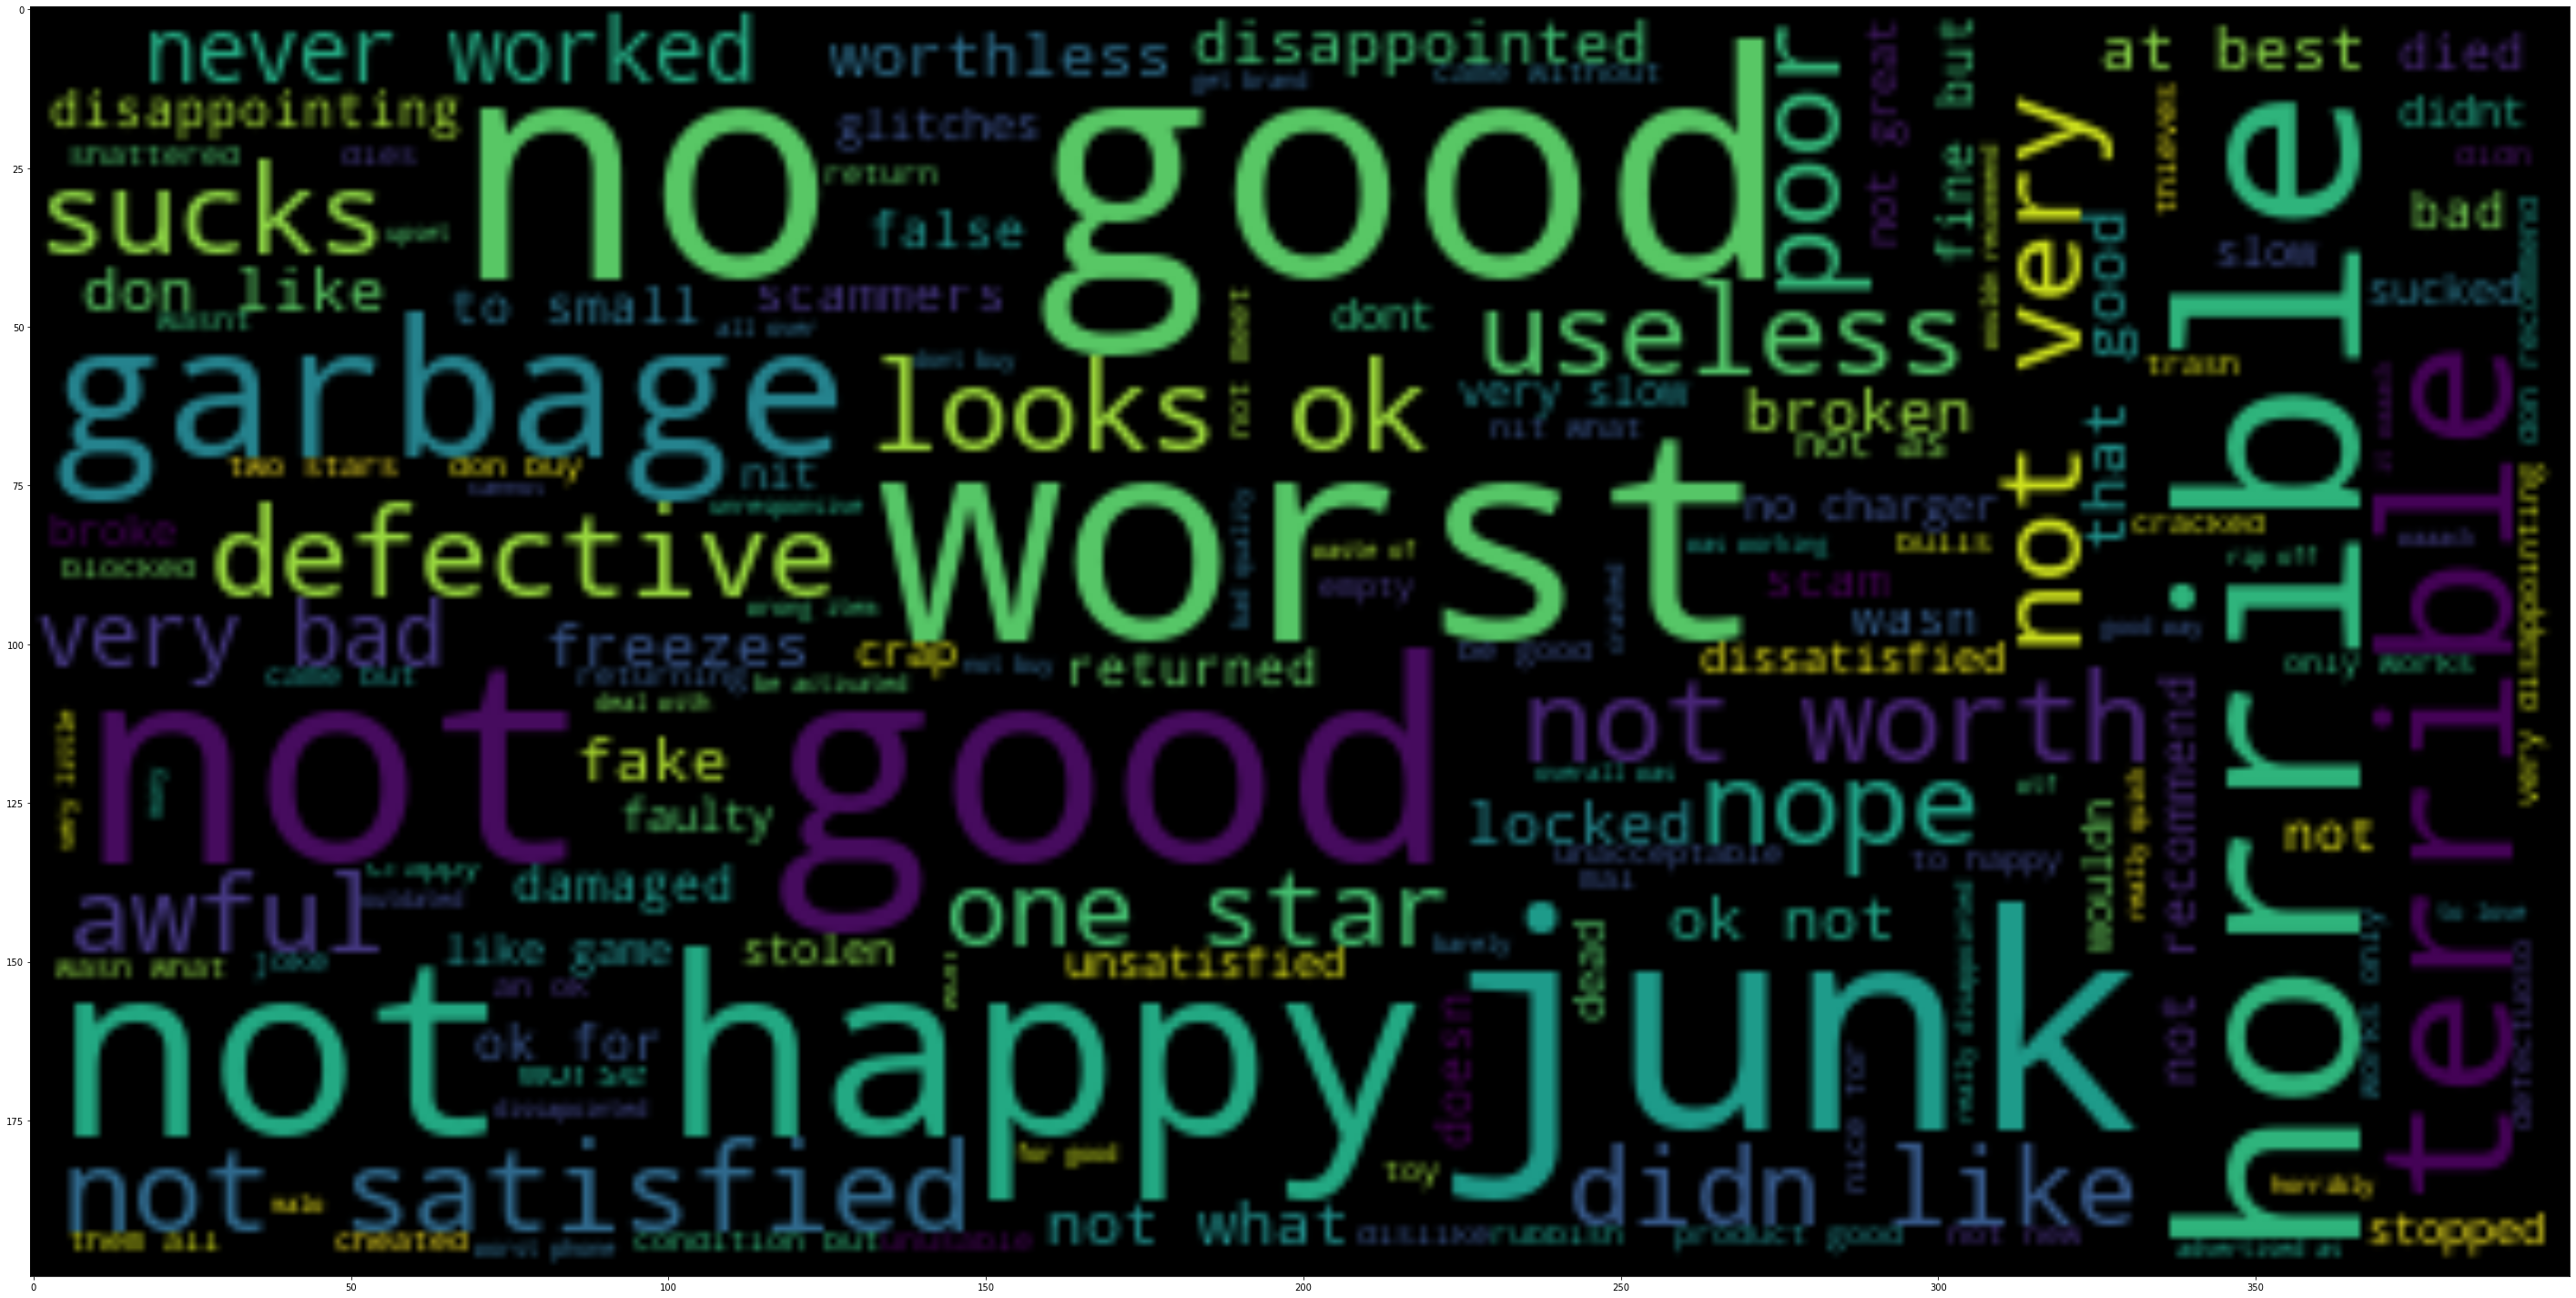

In [26]:
from wordcloud import WordCloud
negative=dict([i for i in zip(feature_names[sorted_coef_index][0:2000],abs(coef[0:2000]))])


plt.figure(figsize = (50,50))
wc = WordCloud(background_color = 'black', max_words = 2000, random_state=42, max_font_size = 50)
wc.generate_from_frequencies(negative)
plt.imshow(wc, interpolation='bilinear')

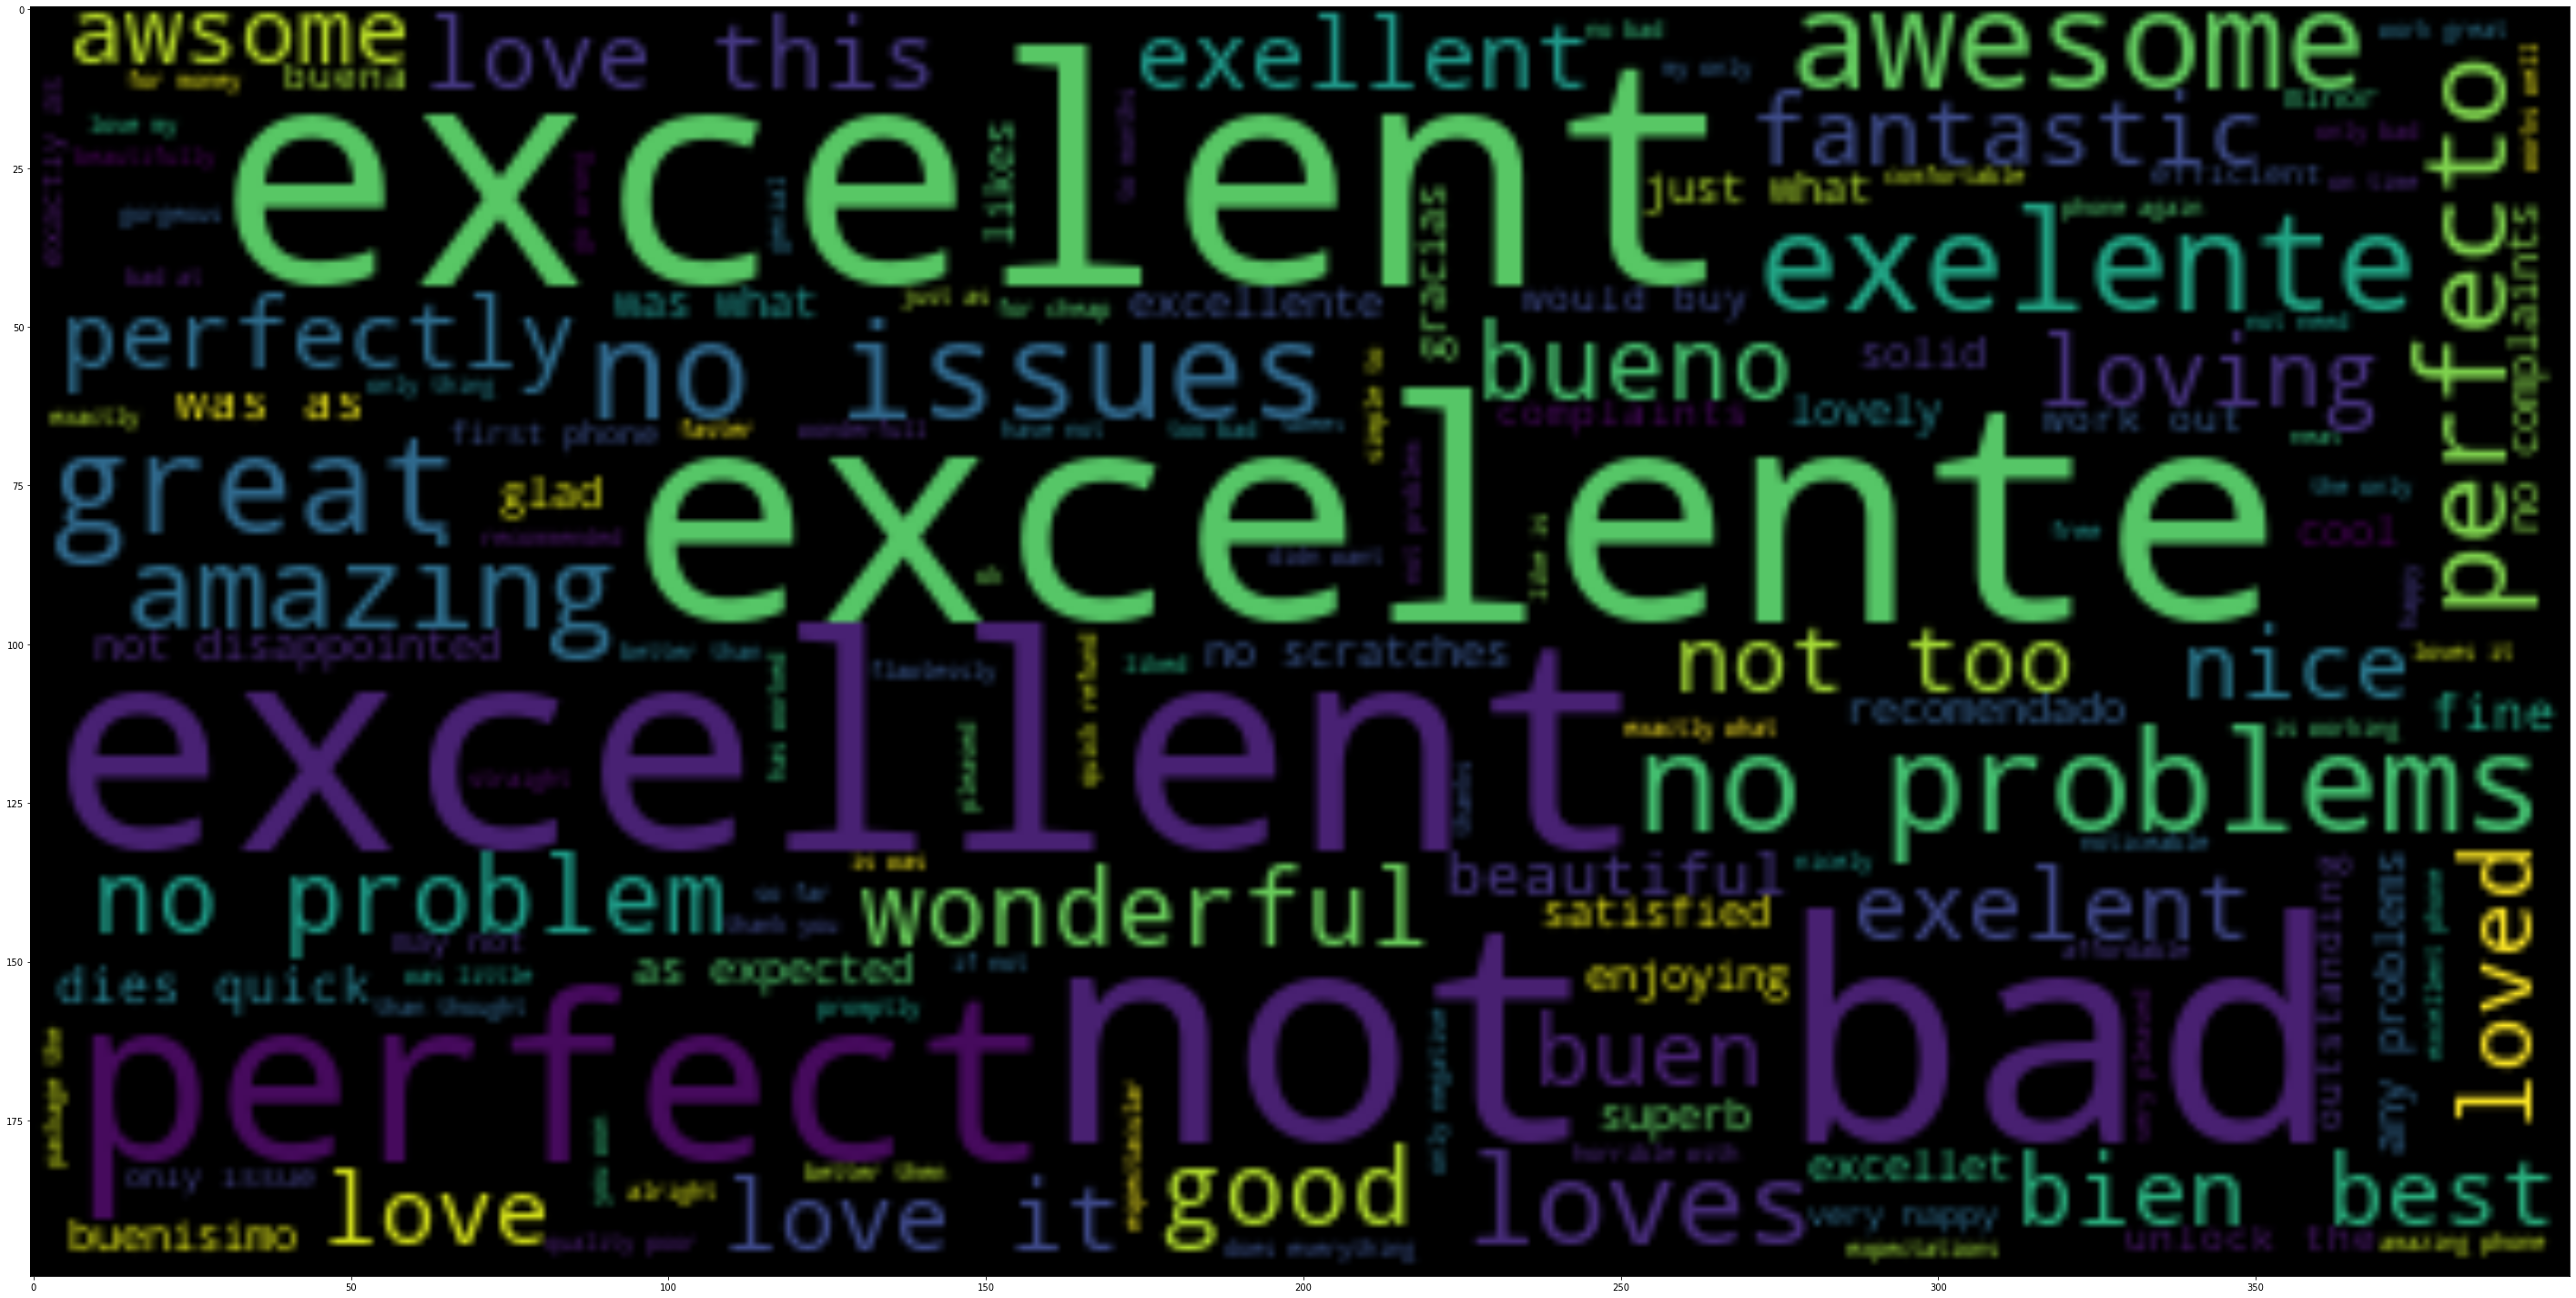

In [27]:
positive=dict([i for i in zip(feature_names[sorted_coef_index][2000:],abs(coef[2000:]))])


plt.figure(figsize = (50,50))
wc = WordCloud(background_color = 'black', max_words = 2000, random_state=42, max_font_size = 50)
wc.generate_from_frequencies(positive)
plt.imshow(wc, interpolation='bilinear')

In [93]:
y_train[y_train==1]

SyntaxError: invalid syntax (<ipython-input-93-ace3e177e089>, line 3)